# Image Classification using Keras and TF -   

In [74]:
import numpy as np 
import pandas as pd 

%matplotlib inline 
import matplotlib as mtp 
import matplotlib.pyplot as plt 

In [75]:
import tensorflow as tf     # pip install tensorflow==<version_name> 
from tensorflow import keras 

In [76]:
tf.__version__

'2.19.0'

In [77]:
keras.__version__ 

'3.10.0'

In [78]:
np.random.seed(42) 
tf.random.set_seed(42) 

# Image dataset loading (available in keras)  

In [79]:
fashion_mnist = keras.datasets.fashion_mnist 
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data() 

In [80]:
print(f"Train size :\n{x_train_full.shape}\n{y_train_full.shape}\nTest size : \n{x_test.shape}\n{y_test.shape}") 

Train size :
(60000, 28, 28)
(60000,)
Test size : 
(10000, 28, 28)
(10000,)


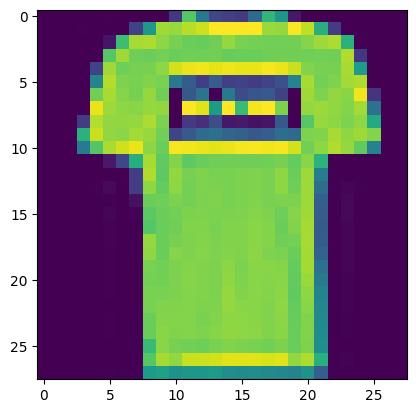

In [81]:
plt.imshow(x_train_full[1])    # sample image out of 60k images 

In [82]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"] 

In [83]:
class_names[y_train_full[1]] 

'T-shirt/top'

Data Normalization (we normalize the data so that it is approximately the same scale)  

In [84]:
x_train_n = x_train_full / 255.0      # 255 is the final limit in pixel colors 
x_test_n = x_test / 255.0 

Data splitting as train, validation, and test sets  

In [85]:
X_valid, X_train = x_train_n[:5000], x_train_n[5000:] 
y_valid, y_train = y_train_full[:5000], y_train_full[5000:] 
X_test = x_test_n 

In [86]:
X_valid 

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [87]:
y_valid 

array([9, 0, 0, ..., 5, 8, 3], dtype=uint8)

# Neural Network Model (in Keras)  

In [88]:
# Sequential model object 
model = keras.models.Sequential([
    keras.layers.Input(shape=(28,28)),   # Input layer; making the 2D array to a 1D format for input layer 
    keras.layers.Flatten(), 
    keras.layers.Dense(300, activation='relu'),  # Hidden layer 1; with 300 neurons and ReLU activation function  _| 0 for -ve values & |
    keras.layers.Dense(100, activation='relu'),  # Hidden layer 2; with 100 neurons and ReLU activation function   | 1 for +ve values.  |
    keras.layers.Dense(10, activation='softmax')  
    # Output layer; with 10 neurons and softmax activation function for exclusive class classification
])       

##  OR --
# model = keras.models.Sequential() 
# model.add(keras.layers.Flatten(input_shape=[28, 28]))     # Input layer; making the 2D array to a 1D format for input layer 
# model.add(keras.layers.Dense(300, activation='relu'))     # Hidden layer 1; with 300 neurons and ReLU activation function  _| 0 for -ve values & |
# model.add(keras.layers.Dense(100, activation='relu'))     # Hidden layer 2; with 100 neurons and ReLU activation function   | 1 for +ve values.  |
# model.add(keras.layers.Dense(10, activation='softmax'))   # Output layer; with 10 neurons and softmax activation function for exclusive class classification 


model.summary() 

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

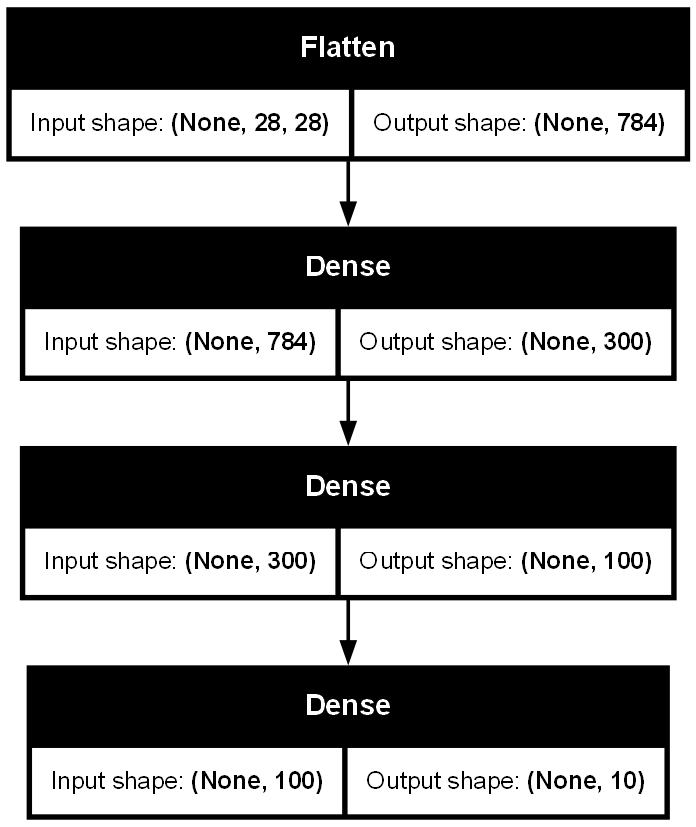

In [89]:
import pydot 
from IPython.display import Image  

# keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')  

keras.utils.plot_model(model, show_shapes=True, to_file='model.png', dpi=130)   
Image('model.png')  

In [90]:
weight_l1, bais_l1 = model.layers[1].get_weights()   # Weight and bias distribution at different dense layers 
weight_l2, bais_l2 = model.layers[2].get_weights()   # Weight and bias distribution at different dense layers 
weight_l3, bais_l3 = model.layers[3].get_weights()   # Weight and bias distribution at different dense layers 

In [91]:
weight_l1 

array([[ 0.02103858,  0.0369535 , -0.05220834, ..., -0.01651658,
         0.03658647, -0.0709465 ],
       [ 0.06635751, -0.05115946, -0.07376538, ...,  0.01747102,
        -0.06484953, -0.00463318],
       [-0.02216648, -0.02287002, -0.0419079 , ..., -0.07415579,
        -0.0645469 ,  0.07187432],
       ...,
       [-0.06191545, -0.00882327, -0.04614019, ..., -0.00579153,
        -0.04146558,  0.06029338],
       [-0.03933328, -0.02180894, -0.05891211, ...,  0.01763382,
        -0.02363998, -0.0180996 ],
       [-0.01585328, -0.00956058,  0.02914631, ...,  0.02070217,
        -0.00055874,  0.01161481]], dtype=float32)

In [92]:
bais_l1 

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [93]:
print(f"Weight shape : {weight_l1.shape}\nBias shape : {bais_l1.shape}") 

Weight shape : (784, 300)
Bias shape : (300,)


In [94]:
weight_l2 

array([[-0.07203749,  0.04154836, -0.11331622, ..., -0.00882594,
        -0.05728608,  0.11111008],
       [-0.05512614, -0.0635826 , -0.09741318, ..., -0.02370796,
        -0.07309477, -0.02897914],
       [-0.04609317, -0.00797594, -0.08512986, ..., -0.04620145,
         0.09158296,  0.05498692],
       ...,
       [-0.10886614, -0.06297339, -0.05052232, ...,  0.06590921,
         0.06530272,  0.07095277],
       [ 0.10442115, -0.09516839,  0.05270968, ...,  0.01419549,
         0.01166854,  0.10873694],
       [ 0.08717472,  0.05006594, -0.09262044, ...,  0.08860243,
         0.02368904,  0.06199919]], dtype=float32)

In [95]:
bais_l2 

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [96]:
print(f"Weight shape : {weight_l2.shape}\nBias shape : {bais_l2.shape}") 

Weight shape : (300, 100)
Bias shape : (100,)


In [97]:
weight_l3 

array([[-1.58378527e-01,  9.31097865e-02,  1.62653059e-01,
         8.03090334e-02, -8.42349380e-02, -1.37610435e-01,
        -9.31071788e-02, -3.55127901e-02, -2.02441216e-02,
         1.05425715e-01],
       [-1.55925602e-01,  5.90174198e-02, -1.16056204e-01,
         1.73245609e-01, -1.79649502e-01,  1.35076374e-01,
        -4.36441749e-02,  1.23351067e-01,  1.34379625e-01,
        -3.08084488e-02],
       [ 4.47447002e-02, -3.00046653e-02,  1.21066511e-01,
        -2.58077681e-02,  7.09204078e-02, -2.02718064e-01,
         4.53094840e-02,  1.81245297e-01, -1.82270870e-01,
        -1.91676378e-01],
       [ 1.98912054e-01, -1.59211814e-01, -2.26529330e-01,
        -4.41999435e-02, -6.96950555e-02,  8.24081004e-02,
        -1.65744722e-01, -1.41352683e-01,  3.87269557e-02,
        -3.67807895e-02],
       [-1.56893417e-01,  1.88612938e-03, -2.26728618e-01,
        -4.22067940e-03,  1.47580385e-01,  2.15849578e-01,
         2.30504274e-02,  8.87319744e-02,  1.06368095e-01,
        -4.

In [98]:
bais_l3 

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [99]:
print(f"Weight shape : {weight_l3.shape}\nBias shape : {bais_l3.shape}") 

Weight shape : (100, 10)
Bias shape : (10,)


# Model compilation and showcase -  

In [100]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])    # sgd: Stoichastic Gradient Descent 

In [101]:
model_history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid)) 
print(f"Model parameters : {model_history.params}") 
print(f"Model history : {model_history.history}") 

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6819 - loss: 0.9994 - val_accuracy: 0.8110 - val_loss: 0.5324
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8211 - loss: 0.5088 - val_accuracy: 0.8432 - val_loss: 0.4603
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8407 - loss: 0.4511 - val_accuracy: 0.8520 - val_loss: 0.4241
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8520 - loss: 0.4196 - val_accuracy: 0.8594 - val_loss: 0.3997
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8606 - loss: 0.3973 - val_accuracy: 0.8620 - val_loss: 0.3835
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8658 - loss: 0.3798 - val_accuracy: 0.8674 - val_loss: 0.3717
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8698 - loss: 0.3655 - val_accuracy: 0.8704 - val_loss: 0.3617
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8742 - loss: 0.3530 - 

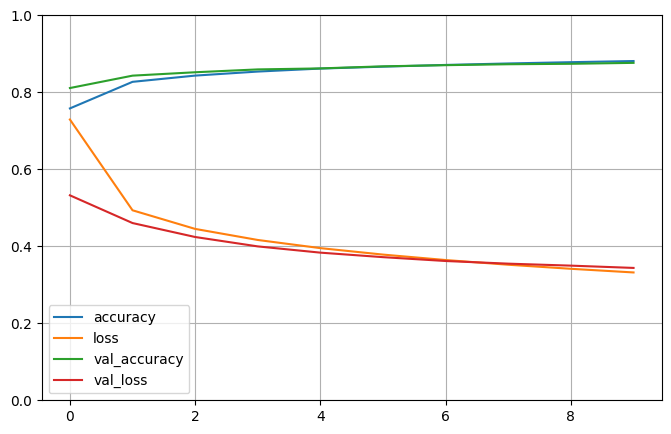

In [102]:
pd.DataFrame(model_history.history).plot(figsize=(8,5)) 
plt.grid(True) 
plt.gca().set_ylim(0, 1) 
plt.show() 

# Model performance -  

In [103]:
model.evaluate(X_test, y_test)    # (independent_test_set, dependent_test_set) 

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8639 - loss: 0.3812  


[0.3859192728996277, 0.861299991607666]

In [104]:
X_new = X_test[:3] 
X_new 

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [105]:
y_prob = model.predict(X_new)     # Probability of each class at each record 
y_prob.round(3) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.059, 0.   , 0.126, 0.004,
        0.81 ],
       [0.   , 0.   , 0.987, 0.   , 0.011, 0.   , 0.002, 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ]], dtype=float32)

In [106]:
y_pred = np.argmax(model.predict(X_new), axis=-1)      # Prediction of classes 
y_pred 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


array([9, 2, 1])

In [107]:
np.array(class_names)[y_pred]     # Description of predicted classes 

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

AxesImage(shape=(28, 28))


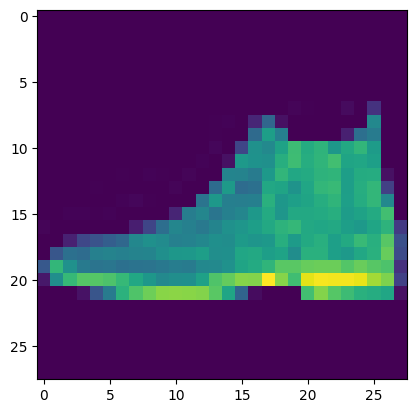

In [108]:
print(plt.imshow(X_new[0]))      # print(plt.imshow(X_test[0])) 

AxesImage(shape=(28, 28))


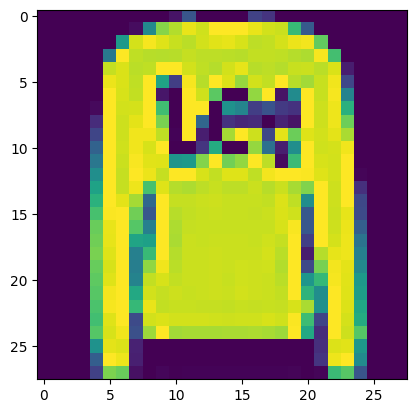

In [109]:
print(plt.imshow(X_new[1]))       # print(plt.imshow(X_test[0])) 

AxesImage(shape=(28, 28))


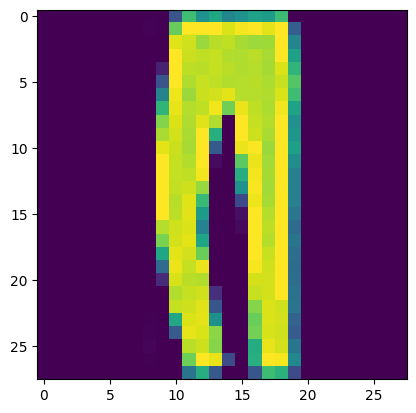

In [110]:
print(plt.imshow(X_new[2]))        # print(plt.imshow(X_test[0])) 